In [2]:
import rasterio
import dask.array as da
from dask_rasterio import read_raster, write_raster
import os
import fnmatch

input_tif=r"Z:\LWI_StageIV\Hurricane Katrina 2005"

merge_dir=[]
for filename in fnmatch.filter(os.listdir(input_tif),'*.01h'): 
    merge_dir.append((os.path.join(input_tif, filename)))

merge_dir.sort()

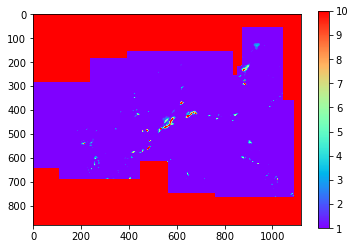

In [4]:
read_raster(merge_dir[0], band=1, block_size=10)

from matplotlib import pyplot
src = rasterio.open(merge_dir[0])
# a = src.read()
# a.shape
pyplot.imshow(src.read(1), cmap='rainbow', vmin=1, vmax=10)
# pyplot.show()
pyplot.colorbar()

C:\Tools\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


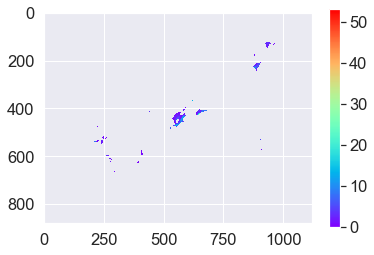

In [25]:
from rasterio.plot import show
import numpy as np
import seaborn as sns
sns.set_style("white")
sns.set(font_scale=1.5)
# show((src, 1), cmap='turbo', title='Ida')
# src.nodata = 0
# src.nodata
# msk = src.read_masks(1)
# show(msk,1)
array = src.read(1)
array[array==0] = np.nan
array[array==9999] = np.nan
# src.nodata
pyplot.imshow(  array, 
                cmap='rainbow', 
                vmin=0,
                vmax=53)
# pyplot.show()
pyplot.colorbar()

# show(array)

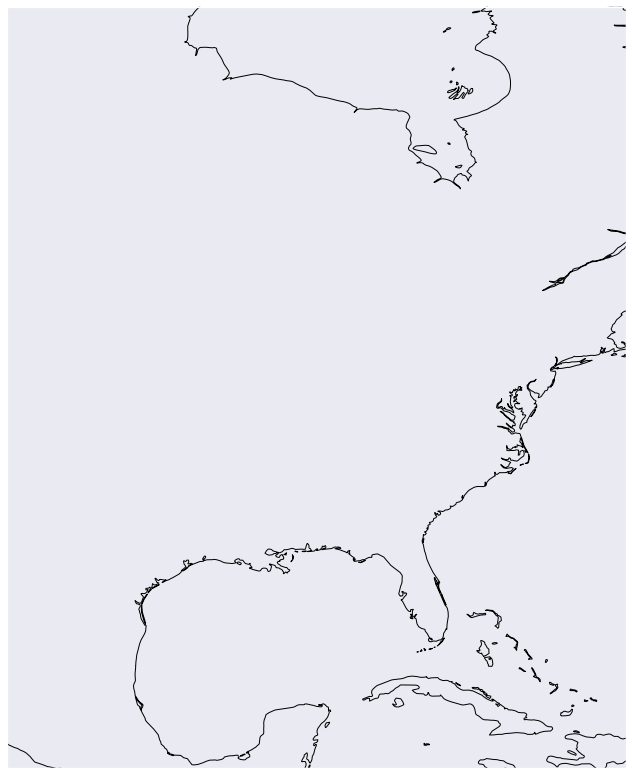

In [115]:
import cartopy.crs as ccrs

# lons, lats = src.getLatLonCoords()
# lons, lats = grid.getLatLonCoords()
# bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
# bbox = [src.bounds.right, src.bounds.left, src.bounds.bottom, src.bounds.top]
# bbox = 
# src.bounds.left
# src.coords.BoundingBox
cmap = pyplot.get_cmap('rainbow')
fig, ax = pyplot.subplots(figsize=(20, 14),
            subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([-105,-70,18,60])
ax.coastlines(resolution='50m')
cs = ax.pcolormesh(array, cmap=cmap)

In [122]:
# import xarray as xr
# da = xr.open_rasterio(array)
# ax = pyplot.subplot(projection=ccrs.PlateCarree())
# da.plot.imshow(ax=ax, rgb='band', transform=ccrs.PlateCarree())
# ax.coastlines('10m', color='r')
# pyplot.show()

In [26]:
map2array=[]
for raster in merge_dir:
    # print(f'adding {raster} to dask array list: map2array')
    src = rasterio.open(raster)
    array = src.read(1)
    array[array==0] = np.nan    
    array[array==9999] = np.nan
    # map2array.append(read_raster(raster, band=1, block_size=10))
    map2array.append(da.from_array(array, chunks=array.shape))
    


In [27]:
ds_stack = da.stack(map2array)

with rasterio.open(merge_dir[0]) as src:
    profile=src.profile
    profile.update(compress='lzw')
    profile

In [28]:
write_raster("output_katrina.tif", da.nansum(ds_stack,0), **profile)

In [1]:
from matplotlib import pyplot
src = rasterio.open("output_test.tif")
pyplot.imshow(src.read(1), cmap='viridis', vmin=1, vmax=5)
pyplot.show()

NameError: name 'rasterio' is not defined